In [3]:
# Script Name: Assignment 3 
# Purpose of script: Complete Assignment 3 for Econ 320
# Author: Gavin Mason
# Date Created: 9/9/2022
# Notes:

# Packages
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.optimize import minimize

In [4]:
#Following the DGP from Assignment 2, take a sample of 1000 observations from the population data. 
np.random.seed(123)
x = np.random.normal(10,1,1000)
u = np.random.normal(0,1,1000)
y = 3+(2*x)+u
data = {"x": x, "u": u, "y": y}
datas = pd.DataFrame(data)

In [5]:
#Manually calculate B0 and B1 using the functions sum() and var() in NumPy / Python.


cov_xy = np.cov(x,y)[1,0] 
var_x = np.var(x,ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar

print(f'b0: {b0}\n')
print(f'b1: {b1}\n')

  

b0: 3.3066671979920947

b1: 1.970053717059039



b: 
Intercept    3.306667
x            1.970054
dtype: float64



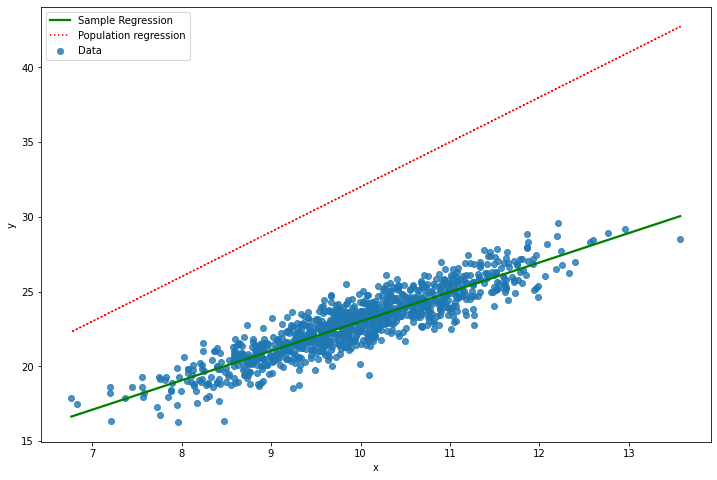

In [7]:
#Using the previous B0 and B1, manually calculate the predicted line and the residuals and plot it in a graph.
reg = smf.ols(formula='y ~ x', data = datas)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')
datas['yhat'] = results
plt.rcParams['figure.figsize'] = [12, 8]
sns.regplot(x = "x",y = "y", data = datas, line_kws={'color':'green'}, ci=None);
plt.plot(datas["x"], 2+3*datas["x"], ':r');
plt.legend(["Sample Regression",'Population regression',"Data"],loc='upper left');